### Chapter 7: Using Pose Estimation to Detect a Skill Level

In [1]:
# import module
import glob
import math
import numpy as np
from keypoints import pose, utils
from pprint import pprint
from scipy.signal import medfilt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

In [2]:
# load the data
files = utils.files_in_order('data/dtw/skiing/experiments')

In [3]:
# create testing and training sets
X_train_names, X_test_names = train_test_split(files, test_size=0.4, random_state=42)
y_train = utils.get_labels_by_level(X_train_names)
y_test = utils.get_labels_by_level(X_test_names)
pprint(X_train_names)
pprint(y_train)
pprint(X_test_names)
pprint(y_test)

array(['skicarve_expert_1.npy', 'skikidwedge_beginner_1.npy'],
      dtype='<U26')
array([1, 0])
array(['skicarve_expert_2.npy', 'skikidwedge_beginner_2.npy'],
      dtype='<U26')
array([1, 0])


In [4]:
# create a function that compares the posture of 2 skiers
def load_features(names):
    output1 = [] # List of upper arm torso angles
    output2 = [] # List of forearm upper arm angles
    for filename in names:
        ps = pose.PoseSequence.load('data/dtw/skiing/experiments/' + filename)
        poses = ps.poses

        dominant_side = utils.get_side(poses)
    
        if dominant_side == 'right':
            joints = utils.get_joints([(pose.nose, pose.neck, pose.rhip) for pose in poses])
        else:
            joints = utils.get_joints([(pose.nose, pose.neck, pose.lhip) for pose in poses])

        # looking down at skis
        neck = utils.get_normalized_joint_vector(joints, 0, 1)
        torso = utils.get_normalized_joint_vector(joints, 1, 2)
        angles = utils.get_angle(torso, neck)
        angles_filtered = medfilt(medfilt(angles, 5), 5)
        print("Max torso/neck angle: ", np.max(angles))
        utils.chart(angles, filename, 'Torso/Neck angle', 'blue')

        joints = utils.get_joints([(pose.rhip, pose.lhip, pose.rknee, pose.lknee, pose.rankle, pose.lankle) for pose in poses])

        rhip = utils.get_normalized_joint_vector(joints, 0, 2)
        lhip = utils.get_normalized_joint_vector(joints, 1, 3)
        rankle = utils.get_normalized_joint_vector(joints, 2, 4)
        lankle = utils.get_normalized_joint_vector(joints, 3, 5)

        # calculate angles
        rknee_angle = utils.get_angle(rhip, rankle)
        lknee_angle = utils.get_angle(lhip, lankle)
        
        rknee_angle_filtered = medfilt(medfilt(rknee_angle, 5), 5)
        lknee_angle_filtered = medfilt(medfilt(lknee_angle, 5), 5)
        
        output1.append(angles_filtered.tolist())
        output2.append(lknee_angle_filtered.tolist())
    return output1, output2

Max torso/neck angle:  82.75143413220597


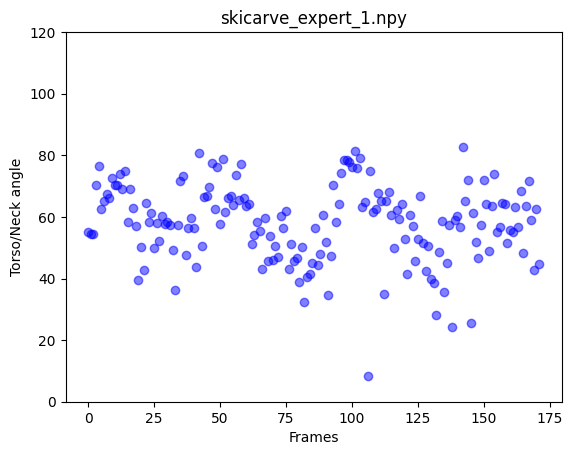

Max torso/neck angle:  112.85492870025797


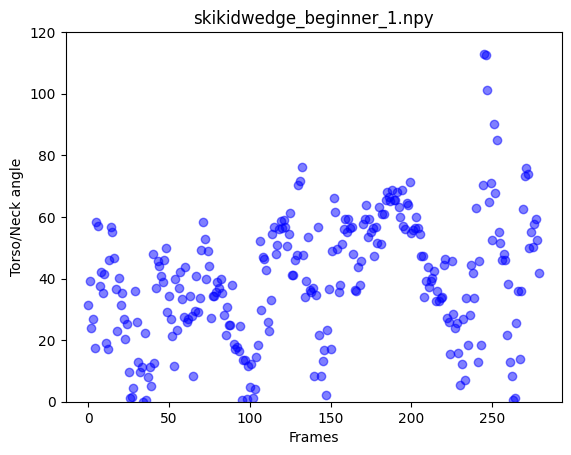

In [5]:
X_train_1, X_train_2 = load_features(X_train_names)

Max torso/neck angle:  82.75143413220597


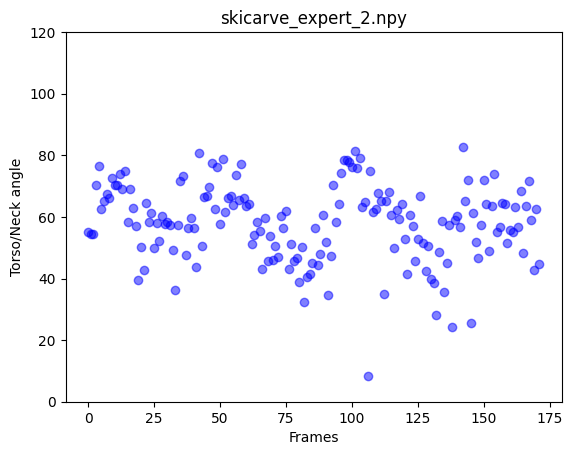

Max torso/neck angle:  112.85492870025797


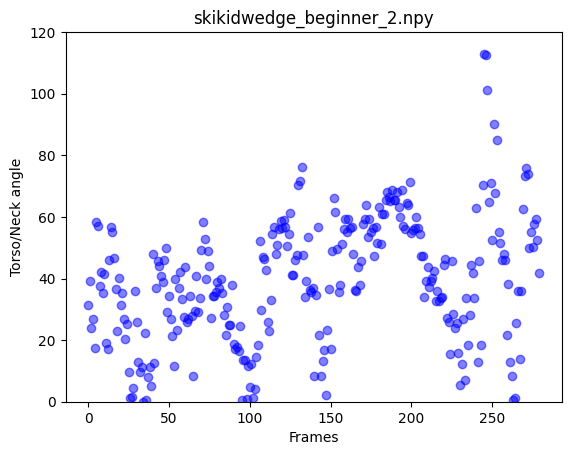

In [6]:
X_test_1, X_test_2 = load_features(X_test_names)